
Checking for missing values:
Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64


<Figure size 800x600 with 0 Axes>

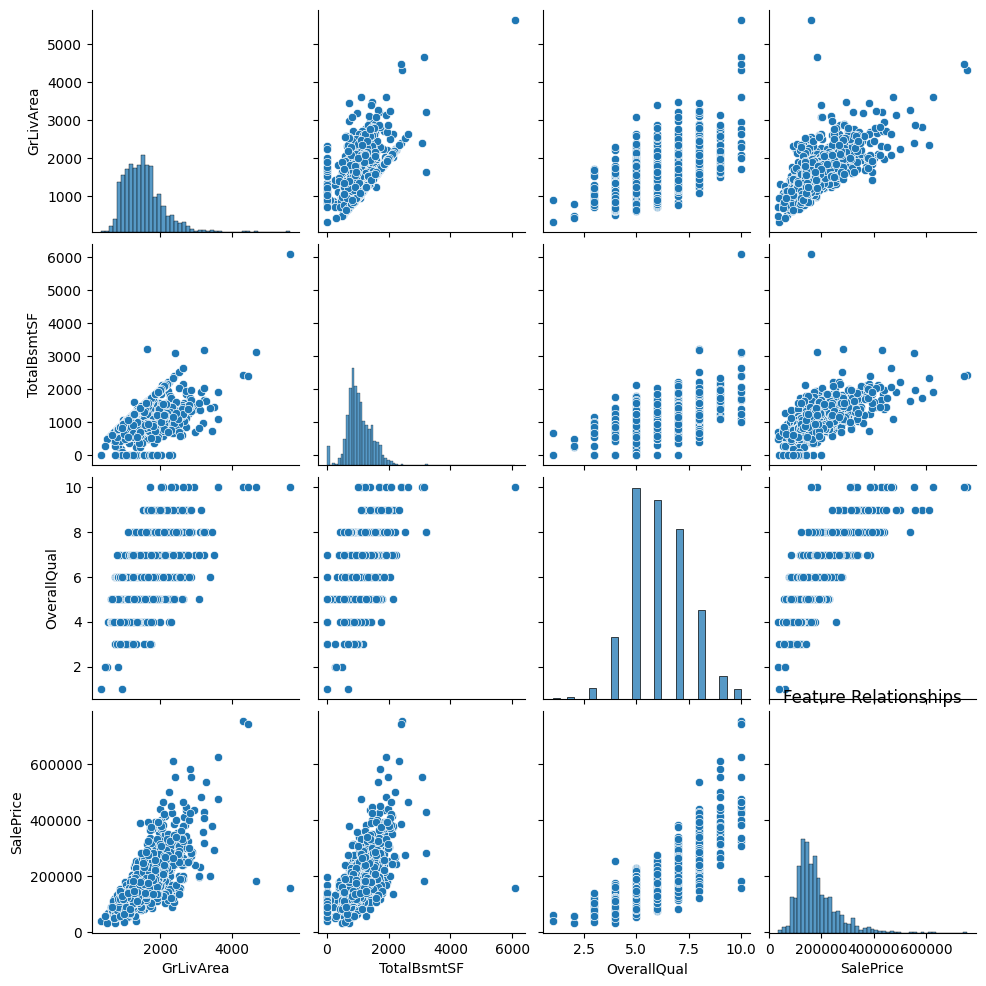


Mean Squared Error: 1667657527.16
R-squared: 0.78


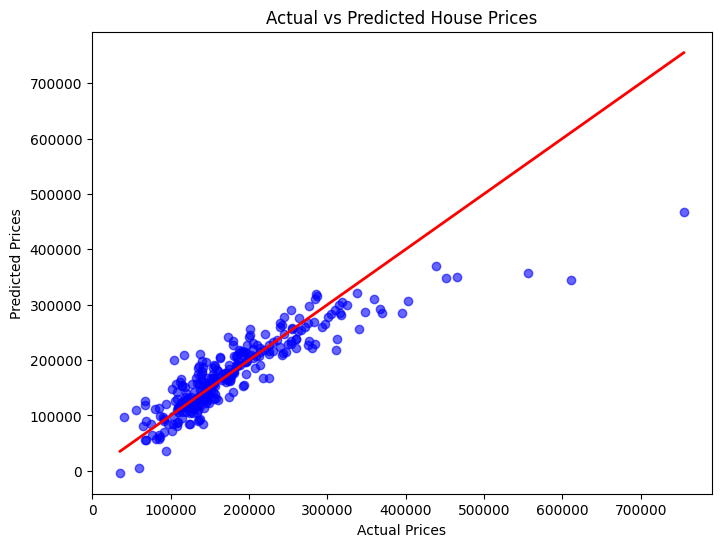


Model Coefficients:
GrLivArea: 24709.0847
TotalBsmtSF: 14612.5360
OverallQual: 38555.2849

Model Intercept: 181441.5420


In [2]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Load external dataset (Replace 'train.csv' with the path to your dataset)
data = pd.read_csv('train.csv')

# Select relevant columns for prediction
# We use 'GrLivArea' (Above ground living area), 'TotalBsmtSF' (Basement area), and 'OverallQual' (Overall quality)
X = data[['GrLivArea', 'TotalBsmtSF', 'OverallQual']]  # Features
y = data['SalePrice']  # Target variable (House prices)

# Check for missing values
print("\nChecking for missing values:")
print(data.isnull().sum())

# Fill missing values (if any) with median of the column
X = X.fillna(X.median())

# Data visualization - relationship between features and price
plt.figure(figsize=(8, 6))
sns.pairplot(data[['GrLivArea', 'TotalBsmtSF', 'OverallQual', 'SalePrice']])
plt.title('Feature Relationships')
plt.show()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features (important for linear regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a Linear Regression model
model = LinearRegression()

# Train the model
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_test_scaled)

# Model Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'\nMean Squared Error: {mse:.2f}')
print(f'R-squared: {r2:.2f}')

# Visualize the comparison between predicted and actual prices
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='b')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.show()
